[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (1051, 571) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 159 nouns are extracted


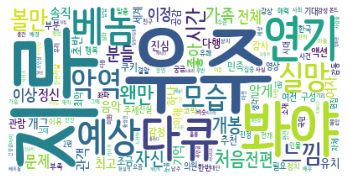

In [9]:
import urllib.request
from bs4 import BeautifulSoup
import re

list_records = []
for index in range(1,101):
    params = urllib.parse.urlencode({'page':index})
    url = f'https://movie.naver.com/movie/point/af/list.naver?{params}'
    res = urllib.request.urlopen(url)
    soup = BeautifulSoup(res,'html.parser')
    table = soup.find('table',class_='list_netizen')
    for i,tr in enumerate(table.select('tbody tr')): 
        for j,td in enumerate(tr.find_all('td')):
            if j == 0:
                recode = int(td.text.strip())
#                 print('글번호:',recode)
            elif j==1:
                recode1 = td.select_one('a.movie').text.strip()
#                 print('제목:',recode1)
                recode2 = int(td.select_one('em').text.strip())
#                 print('점수:',recode2)
                recode3 = td.text.strip()
                recode3 = recode3.replace(recode1,'')
                recode3 = recode3.replace('신고','')
                recode3 = re.sub('별점 - 총 10점 중[0-9]{1,2}','',recode3).strip()
#                 print('감상평:',recode3)
        movid_dic = {'제목':recode1,'점수':recode2,'감상평':recode3}
        list_records.append(movid_dic)

#     print(list_records)

import pandas as pd
df = pd.DataFrame(list_records)
# df
review = ' '.join(df['감상평'].to_list())
# review

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def displayWC(data,width=400,height=200):
    wc = WordCloud(width=width,height=height,font_path='NanumBarunpenB.ttf',background_color='white').generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
# displayWC(review)
    
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract([review])
displayWC(' '.join(nouns))

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (536, 277) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 84 nouns are extracted


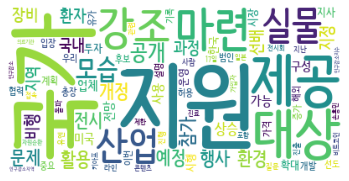

In [14]:
import requests
import urllib.request
from bs4 import BeautifulSoup

url = 'https://news.naver.com/main/read.naver?mode=LSD&mid=shm&sid1=102&oid=417&aid=0000741184'

#res = requests.get(url).text
res = urllib.request.urlopen(url)
soup = BeautifulSoup(res,'html.parser')
news = soup.select('ul.list_txt li a')
#print(len(news))
#print(news)
news_list=[]
for n in news:
    news_dic={}
    title = n['title'].strip()
    #print('제목 : ',title)
    news_dic['title'] = title
    url = n['href']
    res = urllib.request.urlopen(url)
    soup = BeautifulSoup(res,'html.parser')
    content = soup.select_one('#articleBodyContents')
    content = content.text.replace('동영상 뉴스','').strip()
    content = content.replace('// flash 오류를 우회하기 위한 함수 추가','').strip()
    content = content.replace('function _flash_removeCallback() {}','').strip()
#     print(content)
    news_dic['content']=content
    news_list.append(news_dic)

import pandas as pd
df = pd.DataFrame(news_list)
# df
content = ' '.join(df['content'].to_list())
# review

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def displayWC(data,width=400,height=200):
    wc = WordCloud(width=width,height=height,font_path='NanumBarunpenB.ttf',background_color='white').generate(data)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()
    
# displayWC(content)
    
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract([content])
displayWC(' '.join(nouns))